# Домашнє завдання. Інтегральне обчислення. Чисельне інтегрування

Опис домашнього завдання
Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

\
$$
2\left(\frac{4}{1.2\sqrt{2\pi }}e^{- \frac{1}{2}\left(\frac{x - 11}{1.2}\right)^2} + \frac{7}{2.4\sqrt{2\pi }}e^{- \frac{1}{2}\left(\frac{x - 15}{2.4}\right)^2}\right)
$$


**Примітка**. Форма функції наближено відповідає реальним спостереженням, але функція була спрощена для легшого опрацювання.

Позначимо початок і кінець робочого дня як a=9 та b=18 відповідно.

Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

## Завдання 1

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

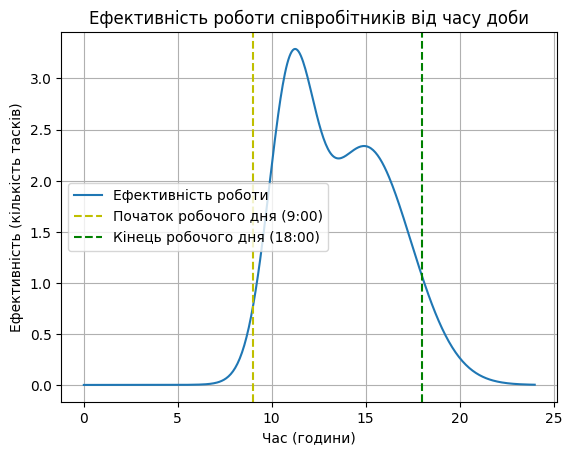

Невизначений інтеграл:
4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)

Визначений інтеграл від 9 до 18:
20.0516450141883


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Оголошення змінної x
x = sp.Symbol('x')

# Визначення функції ефективності
efficiency_func = 2 * ((4 / (1.2 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 11) / 1.2) ** 2) +
                       (7 / (2.4 * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5 * ((x - 15) / 2.4) ** 2))

# Візуалізація функції на відрізку від 0 до 24
x_vals = np.linspace(0, 24, 400)
efficiency_func_numpy = sp.lambdify(x, efficiency_func, 'numpy')
efficiency_vals = efficiency_func_numpy(x_vals)

plt.plot(x_vals, efficiency_vals, label='Ефективність роботи')
plt.axvline(x=9, color='y', linestyle='--', label='Початок робочого дня (9:00)')
plt.axvline(x=18, color='g', linestyle='--', label='Кінець робочого дня (18:00)')
plt.xlabel('Час (години)')
plt.ylabel('Ефективність (кількість тасків)')
plt.title('Ефективність роботи співробітників від часу доби')
plt.legend()
plt.grid(True)
plt.show()

# Обчислення невизначеного інтегралу
indefinite_integral = sp.integrate(efficiency_func, x)
print("Невизначений інтеграл:")
print(indefinite_integral)

# Обчислення визначеного інтегралу від 9 до 18
a, b = 9, 18
definite_integral = sp.integrate(efficiency_func, (x, a, b))
print("\nВизначений інтеграл від 9 до 18:")
print(definite_integral.evalf())


# Завдання 2:
Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.



In [12]:
def rectangle_method(f, a, b, n):
    # Обчислення ширини кожного прямокутника
    width = (b - a) / n
    # Ініціалізація змінної для накопичення сумарної площі прямокутників
    total_area = 0
    # Цикл для обчислення суми площ прямокутників
    for i in range(n):
        # Обчислення значення функції у лівій кінцевій точці поточного прямокутника
        height = f(a + i * width)
        # Додавання площі поточного прямокутника до загальної суми
        total_area += height * width
    # Повернення наближеного значення інтегралу методом прямокутників
    return total_area

n = 1000  # Кількість кроків для чисельного інтегрування
rectangle_integral = rectangle_method(efficiency_func_numpy, a, b, n)
print(f"\nІнтеграл методом прямокутників від {a} до {b}: {rectangle_integral}")



Інтеграл методом прямокутників від 9 до 18: 20.05028422526578


Функція rectangle_method виконує чисельне інтегрування методом прямокутників. Цей метод полягає в наближенні значення визначеного інтегралу шляхом розбиття області інтегрування на малi проміжки і обчислення площі прямокутників, висоти яких визначаються значеннями функції в початкових точках кожного проміжку.

# Завдання 3:

Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

In [8]:
def trapezoid_method(f, a, b, n):
    # Обчислення ширини кожної трапеції
    width = (b - a) / n
    # Ініціалізація змінної для накопичення сумарної площі трапецій
    total_area = 0.5 * (f(a) + f(b))  # Початкове значення: площа першої трапеції

    # Цикл для обчислення суми площ трапецій
    for i in range(1, n):  # Починаємо з i = 1, оскільки f(a) і f(b) вже включені
        total_area += f(a + i * width)  # Додавання висоти на кожному кроці

    total_area *= width  # Множення на ширину трапецій для отримання площі
    return total_area

n = 1000  # Кількість кроків для чисельного інтегрування
trapezoid_integral = trapezoid_method(efficiency_func_numpy, a, b, n)
print(f"\nІнтеграл методом трапецій від {a} до {b}: {trapezoid_integral}")




Інтеграл методом трапецій від 9 до 18: 20.051634332194133


# Завдання 4:

Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

In [13]:
def simpson_method(f, a, b, n):
    if n % 2:
        n += 1  # Перевірка на парність n і корекція, якщо потрібно
    width = (b - a) / n  # Обчислення ширини кожного сегмента Сімпсона
    total_area = f(a) + f(b)  # Початкове значення: сума значень на краях інтервалу

    # Цикл для обчислення суми значень функції з коефіцієнтами 4
    for i in range(1, n, 2):
        total_area += 4 * f(a + i * width)

    # Цикл для обчислення суми значень функції з коефіцієнтами 2
    for i in range(2, n-1, 2):
        total_area += 2 * f(a + i * width)

    total_area *= width / 3  # Множення на коефіцієнт Сімпсона
    return total_area

n = 1000  # Кількість кроків для чисельного інтегрування
simpson_integral = simpson_method(efficiency_func_numpy, a, b, n)
print(f"\nІнтеграл методом Сімпсона від {a} до {b}: {simpson_integral}")




Інтеграл методом Сімпсона від 9 до 18: 20.05164501419637


# Завдання 5

Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [10]:
import scipy.integrate as integrate

scipy_integral, _ = integrate.quad(efficiency_func_numpy, a, b)
print(f"\nІнтеграл за допомогою SciPy від {a} до {b}: {scipy_integral}")



Інтеграл за допомогою SciPy від 9 до 18: 20.051645014188306


# Висновок
Таким чином, за робочий день співробітники виконують приблизно 20.05 завдань. Якщо поділити цю кількість на тривалість робочого дня, отримуємо середню кількість завдань на годину, яка становить приблизно 2.23 завдання на годину.

In [11]:
average_tasks_sympy = definite_integral / (b - a)
print("\nСередня кількість тасків (SymPy):", average_tasks_sympy.evalf())

average_tasks_rectangle = rectangle_integral / (b - a)
print(f"\nСередня кількість тасків (метод прямокутників): {average_tasks_rectangle}")

average_tasks_trapezoid = trapezoid_integral / (b - a)
print(f"\nСередня кількість тасків (метод трапецій): {average_tasks_trapezoid}")

average_tasks_simpson = simpson_integral / (b - a)
print(f"\nСередня кількість тасків (метод Сімпсона): {average_tasks_simpson}")

average_tasks_scipy = scipy_integral / (b - a)
print(f"\nСередня кількість тасків (SciPy): {average_tasks_scipy}")



Середня кількість тасків (SymPy): 2.22796055713203

Середня кількість тасків (метод прямокутників): 2.2278093583628644

Середня кількість тасків (метод трапецій): 2.2279593702437928

Середня кількість тасків (метод Сімпсона): 2.22796055713293

Середня кількість тасків (SciPy): 2.2279605571320342
